In [25]:
# Import Libaries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Import Models
from sklearn import preprocessing
from sklearn import metrics
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import SGDClassifier, LinearRegression, LogisticRegression, Perceptron, RidgeClassifier, RidgeClassifierCV
from sklearn.dummy import DummyClassifier

# Import Model Evaluation Tools
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score, mean_squared_error, f1_score
from sklearn.preprocessing import StandardScaler, LabelEncoder, OneHotEncoder
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score, cross_validate, cross_val_predict


#sampling
from imblearn.over_sampling import RandomOverSampler, SMOTE, ADASYN

#for saving models
import pickle

In [61]:
random_state = 42

In [62]:
df = pd.read_csv("./ST1511 AIML-CA1-datasets/credit_dataset.csv")
original = df.copy()
df.head()

,Customer ID,Credit Limit,Gender,Education,Marriage Status,Age,Bill_Amount1,Bill_Amount2,Bill_Amount3,Pay_Amount1,Pay_Amount2,Pay_Amount3,Default payment next month
0,1,20000,female,univeresity,married,24,3913,3102,689,0,689,0,1
1,2,120000,female,univeresity,single,26,2682,1725,2682,0,1000,1000,1
2,3,90000,female,univeresity,single,34,29239,14027,13559,1518,1500,1000,0
3,4,50000,female,univeresity,married,37,46990,48233,49291,2000,2019,1200,0
4,5,50000,male,univeresity,married,57,8617,5670,35835,2000,36681,10000,0


In [63]:
df.isna().sum()

Customer ID                   0
Credit Limit                  0
Gender                        0
Education                     0
Marriage Status               0
Age                           0
Bill_Amount1                  0
Bill_Amount2                  0
Bill_Amount3                  0
Pay_Amount1                   0
Pay_Amount2                   0
Pay_Amount3                   0
Default payment next month    0
dtype: int64

In [64]:
df.describe()

,Customer ID,Credit Limit,Age,Bill_Amount1,Bill_Amount2,Bill_Amount3,Pay_Amount1,Pay_Amount2,Pay_Amount3,Default payment next month
count,1600.00000,1600.000000,1600.000000,1600.000000,1600.000000,1600.000000,1600.000000,1600.000000,1600.000000,1600.000000
mean,800.50000,166787.500000,35.224375,49263.408125,47726.644375,44531.051875,5547.646250,5230.494375,4451.610625,0.212500
std,462.02453,129944.635707,9.404550,72687.106917,71476.217397,67164.064239,14085.471957,15569.605419,12491.715387,0.409205
min,1.00000,10000.000000,21.000000,-14386.000000,-13543.000000,-9850.000000,0.000000,0.000000,0.000000,0.000000
25%,400.75000,50000.000000,28.000000,3138.000000,3288.250000,2321.500000,1000.000000,468.500000,226.500000,0.000000
50%,800.50000,140000.000000,34.000000,20320.500000,19769.500000,19332.500000,2176.500000,1904.000000,1313.500000,0.000000
75%,1200.25000,230000.000000,41.000000,61602.750000,59891.750000,53857.250000,5021.000000,4592.500000,4000.000000,0.000000
max,1600.00000,700000.000000,75.000000,507726.000000,509229.000000,499936.000000,239104.000000,285138.000000,222750.000000,1.000000


In [65]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1600 entries, 0 to 1599
Data columns (total 13 columns):
 #   Column                      Non-Null Count  Dtype 
---  ------                      --------------  ----- 
 0   Customer ID                 1600 non-null   int64 
 1   Credit Limit                1600 non-null   int64 
 2   Gender                      1600 non-null   object
 3   Education                   1600 non-null   object
 4   Marriage Status             1600 non-null   object
 5   Age                         1600 non-null   int64 
 6   Bill_Amount1                1600 non-null   int64 
 7   Bill_Amount2                1600 non-null   int64 
 8   Bill_Amount3                1600 non-null   int64 
 9   Pay_Amount1                 1600 non-null   int64 
 10  Pay_Amount2                 1600 non-null   int64 
 11  Pay_Amount3                 1600 non-null   int64 
 12  Default payment next month  1600 non-null   int64 
dtypes: int64(10), object(3)
memory usage: 162.6+ KB


In [66]:
df.shape

(1600, 13)

In [67]:
avg_bill = []
avg_payment = []
exceed_payment = []
for i, row in df.iterrows():
    avg_bill_amount = ((row["Bill_Amount1"] + row["Bill_Amount2"] + row["Bill_Amount3"])/3)
    avg_bill.append(avg_bill_amount)
    avg_payment_amount = ((row["Pay_Amount1"] + row["Pay_Amount2"] + row["Pay_Amount3"])/3)
    avg_payment.append(avg_payment_amount)

    if (avg_bill_amount > avg_payment_amount):
        exceed_payment.append(1)
    else:
        exceed_payment.append(0)

df["avg_bill"] = avg_bill
df["avg_payment"] = avg_payment
df["exceed_payment"] = exceed_payment

df.head()

,Customer ID,Credit Limit,Gender,Education,Marriage Status,Age,Bill_Amount1,Bill_Amount2,Bill_Amount3,Pay_Amount1,Pay_Amount2,Pay_Amount3,Default payment next month,avg_bill,avg_payment,exceed_payment
0,1,20000,female,univeresity,married,24,3913,3102,689,0,689,0,1,2568.000000,229.666667,1
1,2,120000,female,univeresity,single,26,2682,1725,2682,0,1000,1000,1,2363.000000,666.666667,1
2,3,90000,female,univeresity,single,34,29239,14027,13559,1518,1500,1000,0,18941.666667,1339.333333,1
3,4,50000,female,univeresity,married,37,46990,48233,49291,2000,2019,1200,0,48171.333333,1739.666667,1
4,5,50000,male,univeresity,married,57,8617,5670,35835,2000,36681,10000,0,16707.333333,16227.000000,1


In [68]:
X, y = df.drop(["Default payment next month", "Customer ID"], axis=1), df["Default payment next month"]

In [69]:
hot_col = ["Gender", "Education", "Marriage Status"]
ohe = OneHotEncoder()
ohe.fit(X[hot_col])
X = pd.concat([
    X.drop(hot_col, axis=1).reset_index(drop=True),
    pd.DataFrame(
        ohe.transform(X[hot_col]).toarray(),
        columns=ohe.get_feature_names_out(),
    ),
],
axis=1)
display(X)

,Credit Limit,Age,Bill_Amount1,Bill_Amount2,Bill_Amount3,Pay_Amount1,Pay_Amount2,Pay_Amount3,avg_bill,avg_payment,exceed_payment,Gender_female,Gender_male,Education_high school,Education_post-graduate,Education_univeresity,Marriage Status_married,Marriage Status_single
0,20000,24,3913,3102,689,0,689,0,2568.000000,229.666667,1,1.0,0.0,0.0,0.0,1.0,1.0,0.0
1,120000,26,2682,1725,2682,0,1000,1000,2363.000000,666.666667,1,1.0,0.0,0.0,0.0,1.0,0.0,1.0
2,90000,34,29239,14027,13559,1518,1500,1000,18941.666667,1339.333333,1,1.0,0.0,0.0,0.0,1.0,0.0,1.0
3,50000,37,46990,48233,49291,2000,2019,1200,48171.333333,1739.666667,1,1.0,0.0,0.0,0.0,1.0,1.0,0.0
4,50000,57,8617,5670,35835,2000,36681,10000,16707.333333,16227.000000,1,0.0,1.0,0.0,0.0,1.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1595,480000,35,18214,11031,182123,0,182123,12960,70456.000000,65027.666667,1,1.0,0.0,0.0,0.0,1.0,1.0,0.0
1596,150000,37,1184,794,2756,0,2772,0,1578.000000,924.000000,1,1.0,0.0,0.0,0.0,1.0,1.0,0.0
1597,110000,29,107195,109443,106637,7845,4000,4000,107758.333333,5281.666667,1,1.0,0.0,0.0,1.0,0.0,0.0,1.0
1598,240000,30,7744,7284,11234,7305,11263,10018,8754.000000,9528.666667,0,0.0,1.0,0.0,1.0,0.0,0.0,1.0


In [70]:
name_col = ["Bill_Amount1", "Bill_Amount2", "Bill_Amount3", "Pay_Amount1", "Pay_Amount2", "Pay_Amount3", "avg_bill", "avg_payment", "Credit Limit"]
sc = StandardScaler()
X[name_col] = sc.fit_transform(X[name_col])

In [71]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=random_state, stratify=y, shuffle=True)
display(y_train.head())

1235    1
1005    0
1313    0
1076    0
1034    0
Name: Default payment next month, dtype: int64

Resampling

[Text(0, 0, '882'), Text(0, 0, '238')]

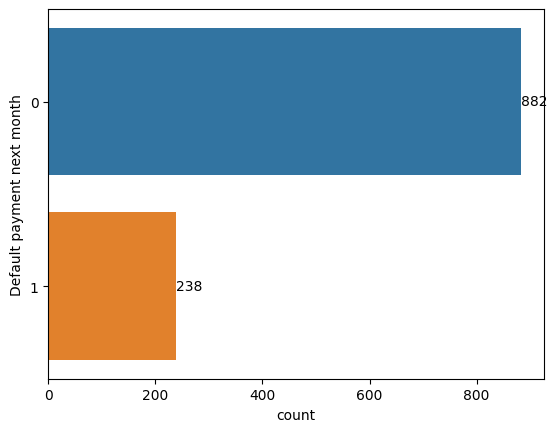

In [72]:
ax = sns.countplot(y=y_train)
ax.bar_label(ax.containers[0])

Since ADASYN is an extention os SMOTE, that focuses more on generating synthetic samples in regions where the minority class is more difficult to learn. I have chosen to use it over the other two methods of Random Oversampling, and SMOTE.

[Text(0, 0, '882'), Text(0, 0, '854')]

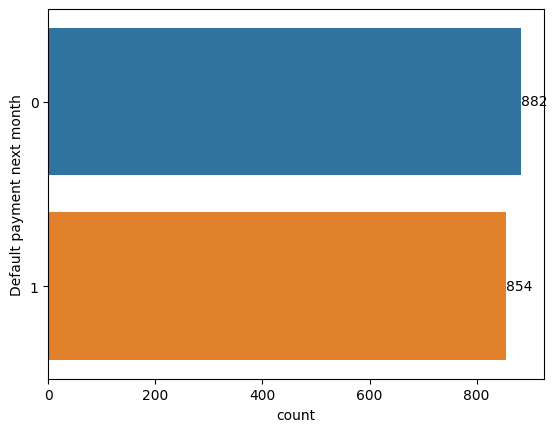

In [73]:
adasyn = ADASYN(random_state=random_state)

X_train_adasyn, y_train_adasyn = adasyn.fit_resample(X_train, y_train)

ax = sns.countplot(y=y_train_adasyn)
ax.bar_label(ax.containers[0])

In [74]:
round_col = ["exceed_payment", "Gender_female", "Gender_male", "Education_high school", "Education_post-graduate", "Education_univeresity", "Marriage Status_married", "Marriage Status_single"]
X_train_adasyn[round_col] = X_train_adasyn[round_col].round()
y_train_adasyn = y_train_adasyn.round()
display(pd.DataFrame(X_train_adasyn))
display(pd.DataFrame(y_train_adasyn))

,Credit Limit,Age,Bill_Amount1,Bill_Amount2,Bill_Amount3,Pay_Amount1,Pay_Amount2,Pay_Amount3,avg_bill,avg_payment,exceed_payment,Gender_female,Gender_male,Education_high school,Education_post-graduate,Education_univeresity,Marriage Status_married,Marriage Status_single
0,-1.052989,54,-0.316323,-0.321321,-0.253162,-0.273250,-0.117605,-0.154039,-0.304152,-0.259809,1,0.0,1.0,0.0,0.0,1.0,0.0,1.0
1,-0.206210,29,-0.637539,-0.595862,-0.640677,-0.250240,-0.238263,-0.149875,-0.637461,-0.311144,1,0.0,1.0,0.0,1.0,0.0,0.0,1.0
2,2.026207,31,-0.267028,-0.117861,-0.022505,0.316194,-0.014809,0.087156,-0.141757,0.181491,1,0.0,1.0,0.0,1.0,0.0,0.0,1.0
3,2.565067,27,2.132194,2.154136,2.278983,0.133964,0.071412,0.066016,2.231857,0.130635,1,0.0,1.0,0.0,1.0,0.0,0.0,1.0
4,-0.822049,39,-0.699151,-0.694947,-0.697779,-0.393979,-0.336048,-0.196320,-0.711833,-0.452160,0,1.0,0.0,0.0,0.0,1.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1731,0.546622,32,1.264074,1.398318,1.492419,0.322687,-0.246832,0.033881,1.410870,0.038449,1,0.0,1.0,0.0,0.0,1.0,1.0,0.0
1732,0.297941,30,1.790460,1.854424,1.984430,0.207880,-0.073004,0.290232,1.912813,0.185080,1,0.0,1.0,0.0,0.0,1.0,0.0,1.0
1733,-0.899029,29,-0.521511,-0.474941,-0.462995,-0.206632,-0.326014,-0.243307,-0.497321,-0.376715,1,1.0,0.0,0.0,1.0,0.0,0.0,1.0
1734,-0.675225,29,-0.447610,-0.418627,-0.383523,-0.298159,-0.254110,-0.275161,-0.426143,-0.396107,1,1.0,0.0,0.0,1.0,0.0,0.0,1.0


,Default payment next month
0,1
1,0
2,0
3,0
4,0
...,...
1731,1
1732,1
1733,1
1734,1


In [75]:
model_list = [DecisionTreeClassifier(),
              RandomForestClassifier(),
              AdaBoostClassifier(),
              LogisticRegression(),
              KNeighborsClassifier(),
              GradientBoostingClassifier(),
              Perceptron(),
              GaussianNB(),
              RidgeClassifier(),
              RidgeClassifierCV(),
              SGDClassifier(),
              DummyClassifier()]
model_list_names = ["DecisionTreeClassifier()",
              "RandomForestClassifier()",
              "AdaBoostClassifier()",
              "LogisticRegression()",
              "KNeighborsClassifier()",
              "GradientBoostingClassifier()",
              "Perceptron()",
              "GaussianNB()",
              "RidgeClassifier()",
              "RidgeClassifierCV()",
              "SGDClassifier()",
              "DummyClassifier"]
scoring_methods = ["accuracy", "balanced_accuracy", "recall", "f1", "roc_auc"]
score_list = []
for i in model_list:
    model = i
    model.fit(X_train_adasyn, y_train_adasyn)

    score = pd.Series(cross_validate(model, X_train_adasyn, y_train_adasyn, cv=10, scoring=scoring_methods, return_train_score=True, n_jobs=4)).apply(np.mean)
    score_list.append(score)

c:\Users\ianli_gu6oysd\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [76]:
scoring = pd.DataFrame(score_list, index=model_list_names)
display(scoring)

,fit_time,score_time,test_accuracy,train_accuracy,test_balanced_accuracy,train_balanced_accuracy,test_recall,train_recall,test_f1,train_f1,test_roc_auc,train_roc_auc
DecisionTreeClassifier(),0.011779,0.005886,0.728739,1.000000,0.728748,1.000000,0.726252,1.000000,0.722682,1.000000,0.728748,1.000000
RandomForestClassifier(),0.387357,0.023537,0.789237,1.000000,0.789051,1.000000,0.775472,1.000000,0.782556,1.000000,0.876545,1.000000
AdaBoostClassifier(),0.154473,0.018351,0.676390,0.738354,0.676158,0.738194,0.650451,0.728214,0.658356,0.732451,0.741111,0.823199
LogisticRegression(),0.020437,0.006182,0.589386,0.604775,0.590258,0.605836,0.647702,0.671865,0.607804,0.625604,0.618964,0.644080
KNeighborsClassifier(),0.001895,0.011669,0.680862,0.820085,0.682806,0.822004,0.807798,0.940934,0.713119,0.837283,0.741932,0.921564
GradientBoostingClassifier(),0.559901,0.006882,0.731111,0.877242,0.730893,0.877200,0.703269,0.874581,0.710399,0.875154,0.808130,0.950513
Perceptron(),0.003191,0.006184,0.516683,0.521445,0.517893,0.522446,0.580233,0.585810,0.401159,0.403415,0.585014,0.595418
GaussianNB(),0.002292,0.005983,0.532270,0.534691,0.538873,0.541296,0.946183,0.950821,0.665719,0.667824,0.571229,0.598025
RidgeClassifier(),0.003591,0.005485,0.566922,0.585383,0.567295,0.585756,0.591573,0.609155,0.573120,0.590814,0.602202,0.628179
RidgeClassifierCV(),0.004687,0.006283,0.569228,0.586087,0.569554,0.586487,0.592709,0.611627,0.574907,0.592203,0.602224,0.628366


GradientBoostingClassifier,  have the highest test_f1 scores. Thus I will continue to use these 3 models, and refine them.

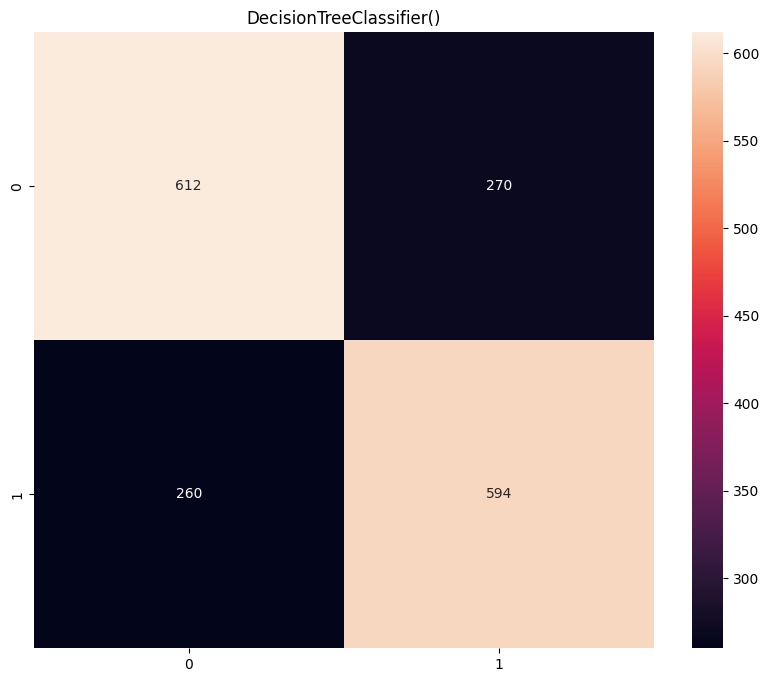

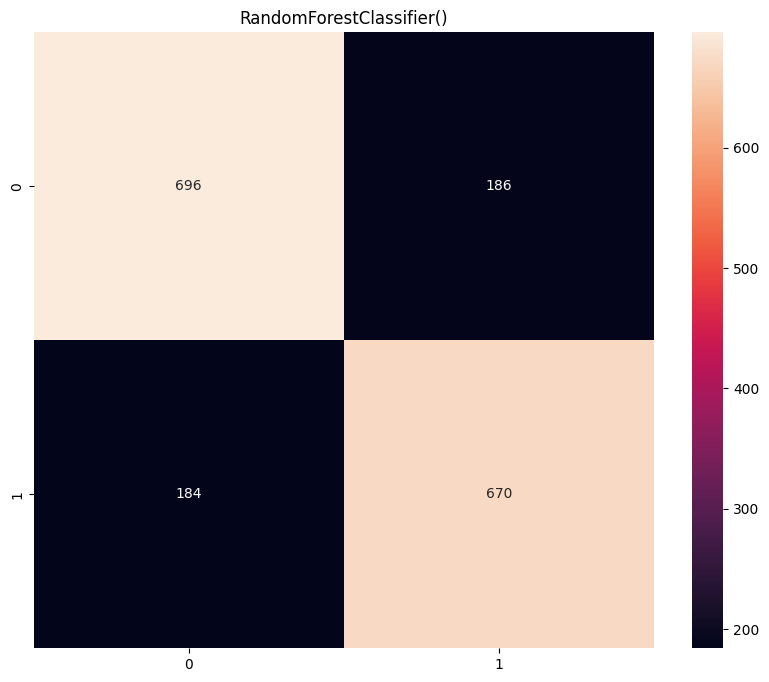

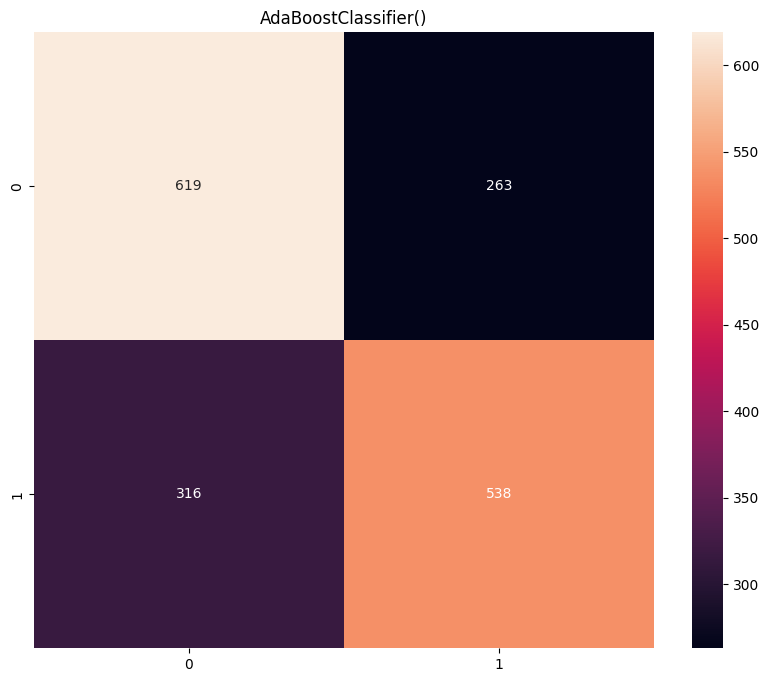

c:\Users\ianli_gu6oysd\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


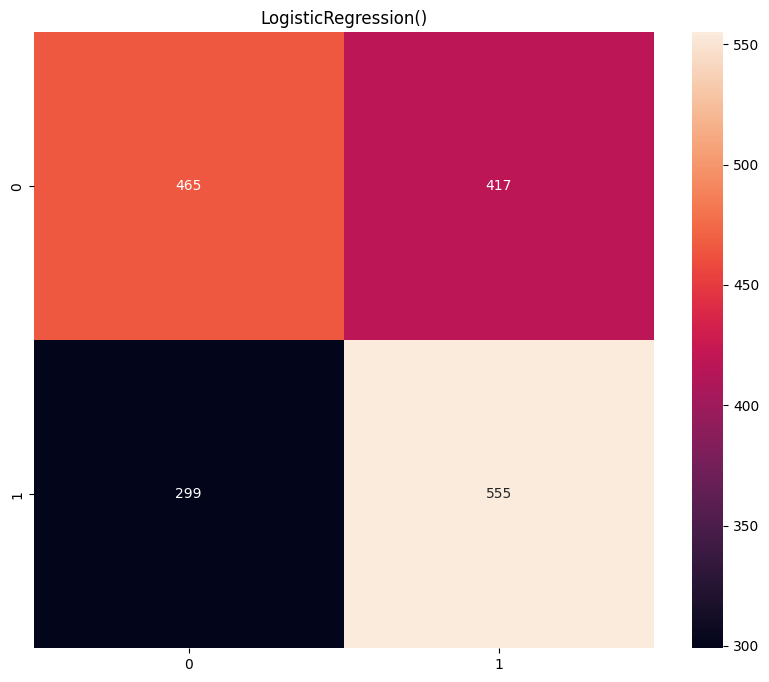

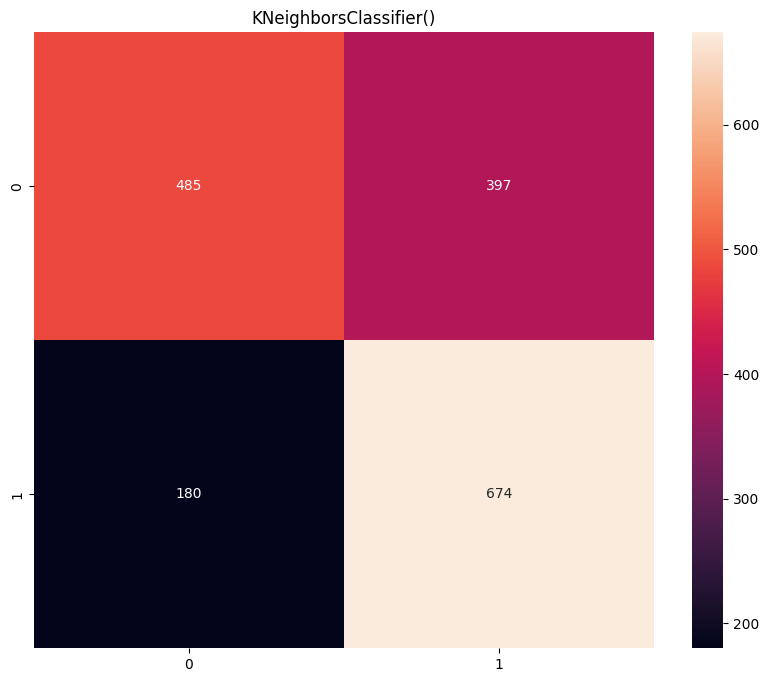

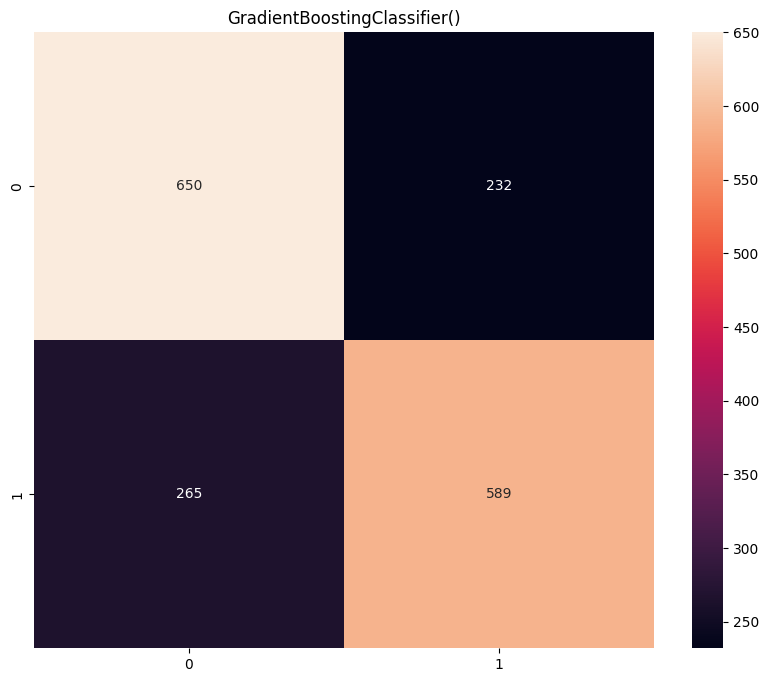

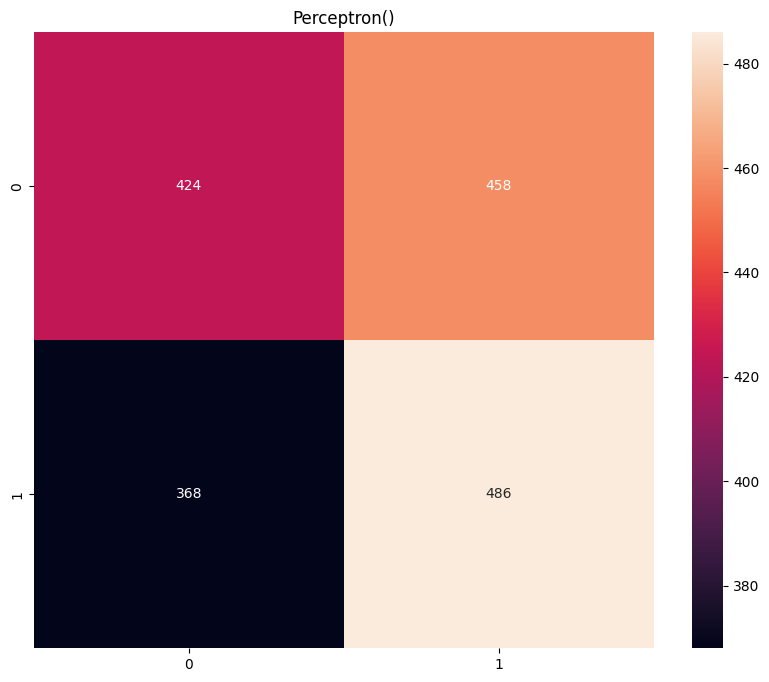

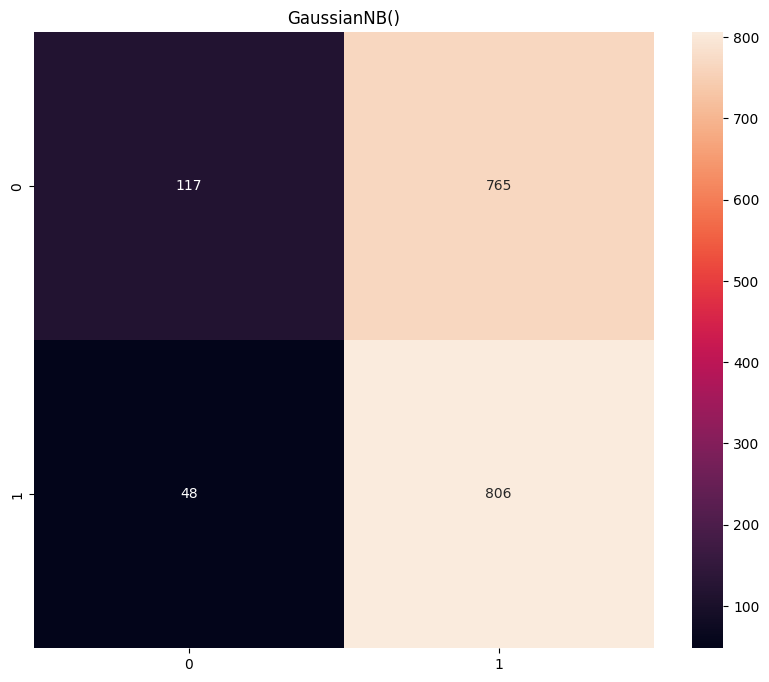

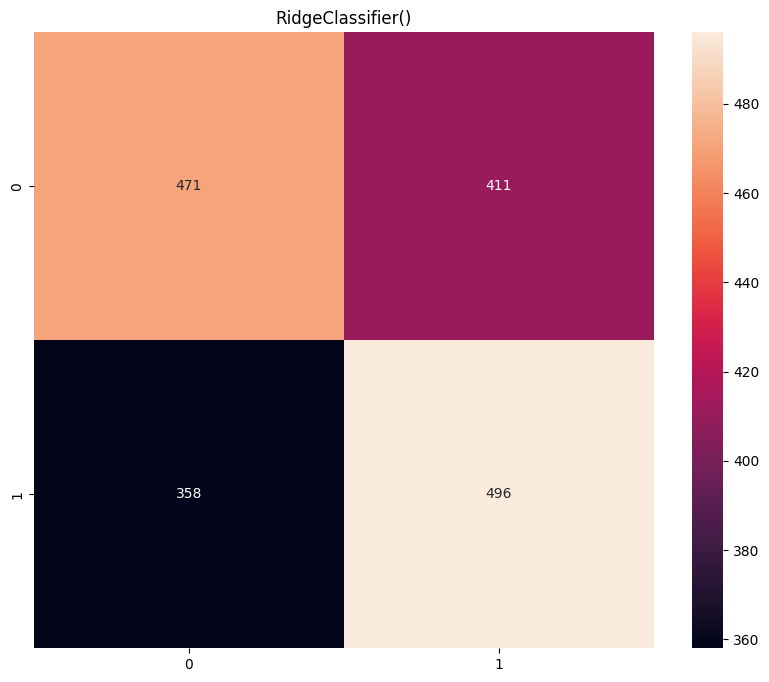

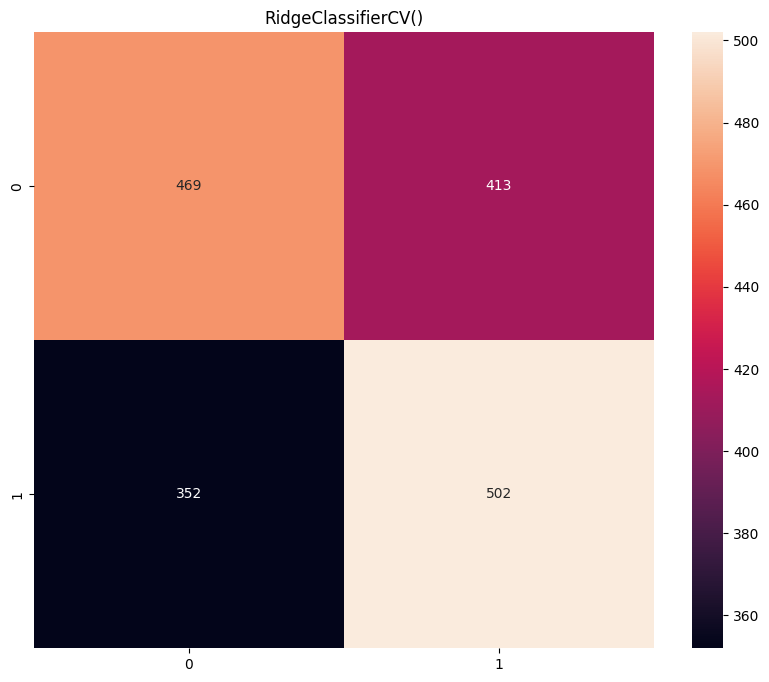

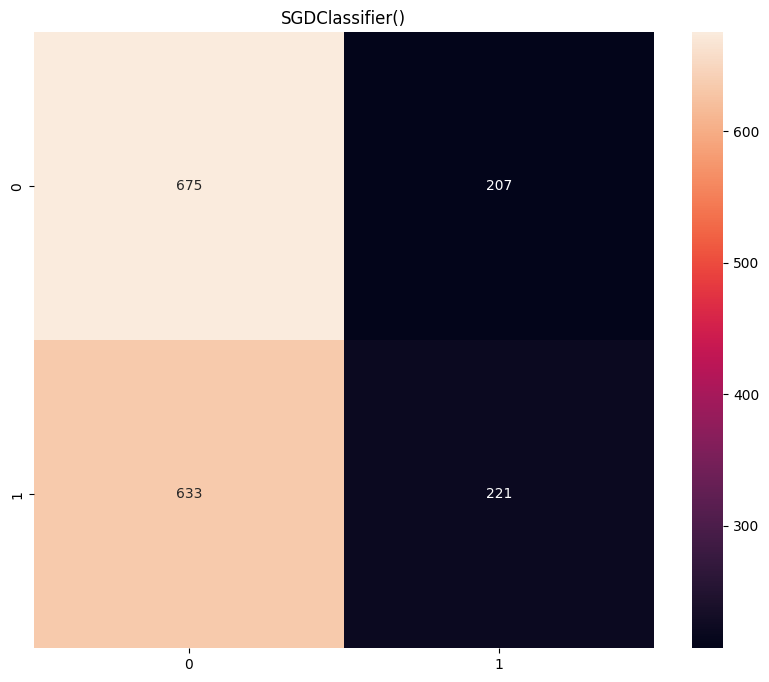

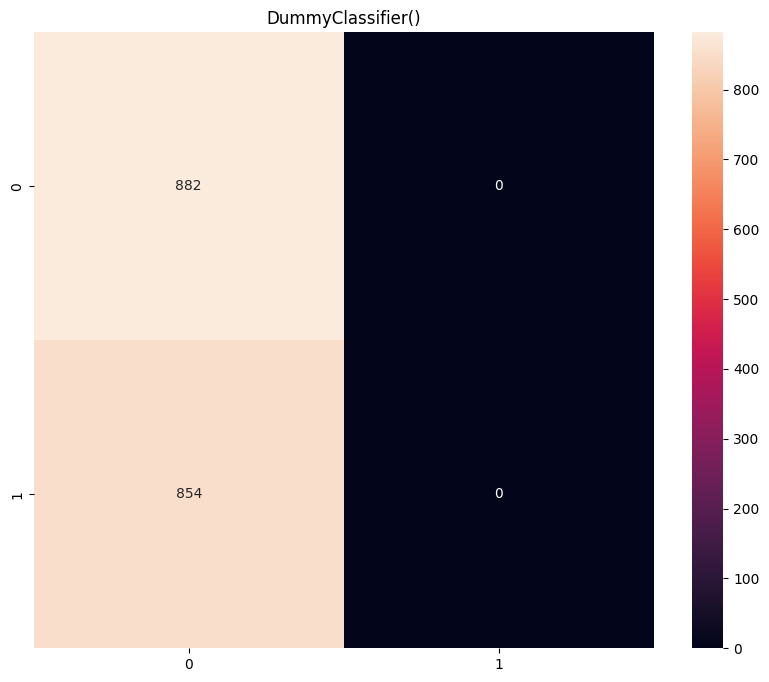

In [77]:
for i in range(len(model_list)):
    cm = confusion_matrix(
            y_train_adasyn, 
            cross_val_predict(model_list[i], X_train_adasyn, y_train_adasyn)
            )
    plt.figure(figsize=(10, 8))
    sns.heatmap(cm, annot=True, fmt="g")
    plt.title(model_list[i])
    plt.show()

In [78]:
parameters = {'n_neighbors': np.arange(1, 30)} 
clfknn = GridSearchCV(KNeighborsClassifier(), parameters, n_jobs=4, scoring="f1", cv=15) 
searchknn = clfknn.fit(X_train_adasyn, y_train_adasyn)
searchknn.best_score_

0.8072932429746176

In [79]:
parameters = {'var_smoothing': np.logspace(0,-9, num=100)} 
clfgnb = GridSearchCV(GaussianNB(), parameters, n_jobs=4, scoring="f1", cv=15) 
searchgnb = clfgnb.fit(X_train_adasyn, y_train_adasyn)
searchgnb.best_score_

0.669201082281775

In [80]:
params_grid = {"max_depth": [5,10,20,30,40,50,60,70,80,90,100], "max_leaf_nodes": np.arange(10, 16)}

clfdtc = GridSearchCV(DecisionTreeClassifier(min_samples_split=2, min_samples_leaf=1, criterion="entropy"), params_grid, cv=15, n_jobs=4, scoring="f1") 
searchdtc = clfdtc.fit(X_train_adasyn, y_train_adasyn)
searchdtc.best_score_

0.6705783170100793

Since KNN has the highest F1 score of 0.762, I will save this model

In [81]:
pickle.dump(clfknn, open("KNN CA1 Classification Model.p", "wb"))
clfknn = pickle.load(open("KNN CA1 Classification Model.p", "rb"))

In [82]:
expected = y_test
predicted = clfdtc.predict(X_test)
# summarize the fit of the model
print(metrics.classification_report(expected, predicted))
print(metrics.confusion_matrix(expected, predicted))

              precision    recall  f1-score   support

           0       0.83      0.44      0.58       378
           1       0.24      0.67      0.36       102

    accuracy                           0.49       480
   macro avg       0.54      0.56      0.47       480
weighted avg       0.71      0.49      0.53       480

[[168 210]
 [ 34  68]]


Since